<h1> Project p2 </h1>
<h2>  </h2>

In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
import os
from numpy import absolute 
%matplotlib inline

1.<br>
<ul>
<li>The input to the Normalization functions can both be dataframe and array. The dataframe is converted to array before any computation.
<li>If there are columns that contain text data, then they are dropped before computation.
<li>If the training data is provided in the form of an array/dataframe then the dataframe, then the normalization of training data is also printed. Otherwise, and integer can be passed and no computation on the training data will be performed

<b>The formula used for Minmax Normalization is:</b><br>
&nbsp; &nbsp; &nbsp; &nbsp;     norm_val=((val-min_val)/(max_val-min_val)*(new_max-new_min))+new_min
<br>
where:<br>
&nbsp; &nbsp; &nbsp; &nbsp;norm_val= Normalised Value
<br>&nbsp; &nbsp; &nbsp; &nbsp;min_val= Minimum Value of the data provided
<br>&nbsp; &nbsp; &nbsp; &nbsp;max_val= Maximum Value of the data provided
<br>&nbsp; &nbsp; &nbsp; &nbsp;new_min= New Minimum Value of the data provided in the function call
<br>&nbsp; &nbsp; &nbsp; &nbsp;new_max= New Maximum Value of the data provided in the function call

In [22]:
#MinMax Normalisation
def minmaxNorm(trData,teData,minV,maxV):
    data=trData
    
    #If input is in dataframe, convert it into numpy
    #This is done so that the function works with both pandas dataframe & num
    if isinstance(data, pd.DataFrame):
        data=data.to_numpy()
    
    #If the training data supplied only has one one-dimension ie a single row data
    axis1=data.shape[0]
    if data.shape==(axis1,):
        trdata=[]
        min_v=min(data)
        max_v=max(data)
        for v in range(np.size(data)):
            val=data[v]
            first=val-min_v
            second=max_v-min_v
            third=maxV-minV
            new_val=(first/second)*third+minV     #Formula for Minmax Normalisation applied
            trdata.append(new_val)
        trdata=np.asarray(trdata)
        print('The Normalised training data is:')
        for i in trdata:
            print(i)
    else:
        del_list=[]
        for c in range(np.size(data,1)-1):
            if type(data[0][c])==str:
                del_list.append(c)
    
        data=np.delete(data, del_list, 1)
        
    #If the data has multiple rows
        trdata=data
        for c in range(np.size(data,1)):
            min_v=min(data[:,c])
            max_v=max(data[:,c])
            for v in range(np.size(data,0)):
                val=data[v][c]
                first=val-min_v
                second=max_v-min_v
                third=maxV-minV
                new_val=((first/second)*third)+minV #Formula for Minmax Normalisation applied
                trdata[v][c]=new_val
        print('The Normalised training data is:')
        for i in trdata:
            print(i)
    
    #The code below works when testdata is provided. Otherwise, it is kept as an integer value (preferably 0)
    if type(teData)!=int:
        data=teData
        if isinstance(data, pd.DataFrame):
            data=data.to_numpy()
    
    #If the testing data supplied only has one one-dimension ie a single row data
        axis1=data.shape[0]
        if data.shape==(axis1,):
            tedata=[]
            min_v=min(data)
            max_v=max(data)
            for v in range(np.size(data)):
                val=data[v]
                first=val-min_v
                second=max_v-min_v
                third=maxV-minV
                new_val=(first/second)*third+minV    #Formula for Minmax Normalisation applied
                tedata.append(new_val)
            tedata=np.asarray(tedata)
            print('The Normalised testing data is:')
            for i in tedata:
                print(i)
        
        
    #If the testing data supplied have multiple rows
        else:
            del_list=[]
            for c in range(np.size(data,1)-1):
                if type(data[0][c])==str:
                    del_list.append(c)
    
            data=np.delete(data, del_list, 1)
            tedata=data
            for c in range(np.size(data,1)):
                min_v=min(data[:,c])
                max_v=max(data[:,c])
                for v in range(np.size(data,0)):
                    val=data[v][c]
                    first=val-min_v
                    second=max_v-min_v
                    third=maxV-minV
                    new_val=((first/second)*third)+minV     #Formula for Minmax Normalisation applied
                    tedata[v][c]=new_val
            print('The Normalised testing data is:')
            for i in tedata:
                print(i)
    


<b>The formula used for z-score Normalization is:</b><br>
&nbsp; &nbsp; &nbsp; &nbsp;     norm_val=(val-mean_val)/std_dev
<br>
where:<br>
&nbsp; &nbsp; &nbsp; &nbsp;norm_val= Normalised Value
<br>&nbsp; &nbsp; &nbsp; &nbsp;mean_val= Mean Value of the data provided
<br>&nbsp; &nbsp; &nbsp; &nbsp;std_dev= Standard Deviation/Absolute Mean Deviation of the data provided

In [23]:
#zscore Normalisation
def zscoreNorm(trData,teData,madFlag):
    code=madFlag
    data=trData
    del_list=[]
    
    #If input is in dataframe, convert it into numpy
    #This is done so that the function works with both pandas dataframe & num
    if isinstance(data, pd.DataFrame):
        data=data.to_numpy()
        
    axis1=data.shape[0]
    
    if data.shape==(axis1,):
        trdata=[]
        c_std=np.std(data)
        c_astd=np.mean(absolute(data - np.mean(data)))
        c_mean=np.mean(data)
        for v in range(np.size(data)):
            val=data[v]
            if(code==0):
                new_val=(val-c_mean)/c_std         #Z-score Normalisation applied
                trdata.append(new_val)
            else:
                new_val=(val-c_mean)/c_astd       #Z-Score Normalisation with mean absolute deviation applied
                trdata.append(new_val)
        trdata=np.asarray(trdata)
        print('Z-Normalised Training Data is:')
        for i in trdata:
            print(i)
            
    #If training data have multiple rows
    else:
        
        for c in range(np.size(data,1)-1):
            if type(data[0][c])==str:
                del_list.append(c)
        data=np.delete(data, del_list, 1)
        trdata=data
    
        for c in range(np.size(data,1)):
            c_std=np.std(data[:,c])
            c_astd=np.mean(absolute(data[:,c] - np.mean(data[:,c])))
            c_mean=np.mean(data[:,c])
            for v in range(np.size(data,0)):
                val=data[v][c]
                if c_std==0:
                    trdata.iloc[v][c]=val
                else:
                    if(code==0):
                        new_val=(val-c_mean)/c_std        #Z-score Normalisation applied
                        trdata[v][c]=new_val
                    else:
                        new_val=(val-c_mean)/c_astd       #Z-Score Normalisation with mean absolute deviation applied
                        trdata[v][c]=new_val
        print('Z-Normalised Training Data is:')
        for i in trdata:
            print(i)
            
    #The code below works when testdata is provided. Otherwise, it is kept as 0        
    if type(teData)!=int:
        data=teData
        if isinstance(data, pd.DataFrame):
            data=data.to_numpy()
    
    #Same code applies to test data as training data
        axis1=data.shape[0]
    
        if data.shape==(axis1,):
            tedata=[]
            c_std=np.std(data)
            c_astd=np.mean(absolute(data - np.mean(data)))
            c_mean=np.mean(data)
            for v in range(np.size(data)):
                val=data[v]
                if(code==0):
                    new_val=(val-c_mean)/c_std         #Z-score Normalisation applied
                    tedata.append(new_val)
                else:
                    new_val=(val-c_mean)/c_astd        #Z-Score Normalisation with mean absolute deviation applied
                    tedata.append(new_val)
            tedata=np.asarray(tedata)
            print('Z-Normalised Testing Data is:')
            for i in tedata:
                print(i)
        
        #If the data has multiple rows
        else:
            for c in range(np.size(data,1)-1):
                if type(data[0][c])==str:
                    del_list.append(c)
            data=np.delete(data, del_list, 1)
            tedata=data
    
            for c in range(np.size(data,1)):
                c_std=np.std(data[:,c])
                c_astd=np.mean(absolute(data[:,c] - np.mean(data[:,c])))
                c_mean=np.mean(data[:,c])
                for v in range(np.size(data,0)):
                    val=data[v][c]
                    if c_std==0:
                        tedata.iloc[v][c]=val
                    else:
                        if(code==0):
                            new_val=(val-c_mean)/c_std       #Z-score Normalisation applied
                            tedata[v][c]=new_val
                        else:
                            new_val=(val-c_mean)/c_astd      #Z-Score Normalisation with mean absolute deviation applied
                            tedata[v][c]=new_val
            print('Z-Normalised Testing Data is:')
            for i in tedata:
                print(i)
    


2.  Report the normalized values for the following group of data:

In [24]:
values=[200,300,400,1200,1000]
values=np.asarray(values)

In [25]:
#min-max normalization with min=0 and max=1
minmaxNorm(values,0,0,1)

The Normalised training data is:
0.0
0.1
0.2
1.0
0.8


In [26]:
#z-score normalization
zscoreNorm(values,0,0)

Z-Normalised Training Data is:
-1.0447890497204886
-0.7960297521679913
-0.5472704546154941
1.4428039258044842
0.9452853306994897


In [27]:
#z-score normalization with mean absolute deviation
zscoreNorm(values,0,1)

Z-Normalised Training Data is:
-1.09375
-0.8333333333333334
-0.5729166666666666
1.5104166666666667
0.9895833333333334


3. IRIS Data Set (Petal Length)

In [28]:
iris_header=['sepal_len','sepal_wid','petal_len','petal_wid','class']
iris_data = pd.read_csv('iris.data', sep=',',names=iris_header)

(a) Use your min-max normalization function with a range (-1.0,1.0), to what values would (1.95; 3.1; 5.68 and 6.2) transform?

In [29]:
petal_values=[1.95, 3.1, 5.68, 6.2]
petal_values=np.asarray(petal_values)

In [30]:
minmaxNorm(petal_values,0,-1,1)

The Normalised training data is:
-1.0
-0.45882352941176463
0.7552941176470587
1.0


(b) Use your z-score normalization function to determine what values (1.95; 3.1; 5.68 and 6.2) would transform to?

In [31]:
#Z-Score Normalization 
zscoreNorm(petal_values,1,0)

Z-Normalised Training Data is:
-1.2933166046558897
-0.641700352583919
0.8201865433688501
1.1148304138709588


In [32]:
#Z-Score Normalization with Mean Absolute Deviation
zscoreNorm(petal_values,1,1)

Z-Normalised Training Data is:
-1.3367496339677891
-0.6632503660322108
0.8477306002928258
1.1522693997071745


c) Comment on which method is preferred for this data, and why?

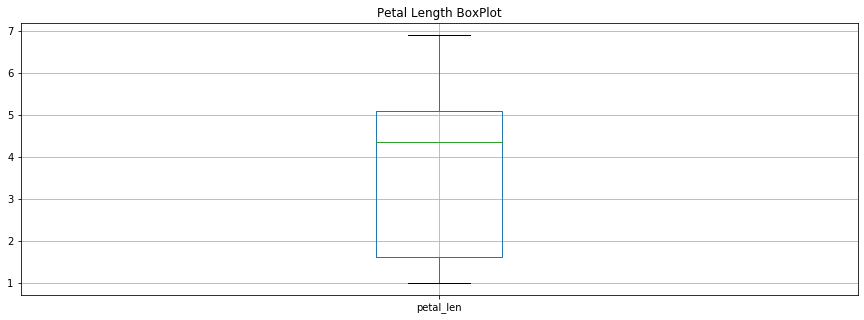

In [33]:
plt.figure(figsize=(15,5))
boxplot = iris_data.boxplot(column='petal_len',figsize=(1,5))
boxplot.title.set_text('Petal Length BoxPlot')

In [34]:
petal_data=iris_data.petal_len
petal_data.describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_len, dtype: float64

a. I would prefer <b>minmax normalisation</b> for the data given, because minmax chooses the min & max values from the data and
scales the data to those values. So, the size of each element can easily be compared to others. They will also be easy to understand on a figure/plot.<br>
b. z-score normalization does not produce the output with the same scale. So data will be very difficult to understand when read by a person or plotted on a figure.
<br>
c. There are very few outliers in the petal length data and so outlier management is not very important. Z-score is generally used to manage outliers. It does not need to be used here.

In [35]:
#4A

In [14]:
data = pd.read_csv("p2-data/college_data.csv")
data.head()

,UnitID,Institution Name,ShortHandName,Early Career Pay,Mid-Career Pay,Total price for in-district students living on campus 2015-16 (DRVIC2015),Professors (S2014_SIS_RV With faculty status tenured),Associate professors (S2014_SIS_RV With faculty status tenured),Assistant professors (S2014_SIS_RV With faculty status on tenure track),Average salary equated to 9 months of full-time instructional staff - professors (DRVHR2014_RV),...,Average salary equated to 9 months of full-time instructional staff - assistant professors (DRVHR2014_RV),Percent admitted - men (DRVADM2014_RV),Percent admitted - women (DRVADM2014_RV),Percent admitted - total (DRVADM2014_RV),Full-time retention rate 2014 (EF2014D_RV),Student-to-faculty ratio (EF2014D_RV),Percent of total enrollment that are women (DRVEF2014_RV),Total enrollment (DRVEF2014_RV),Graduation rate total cohort (DRVGR2014_RV),Percent of full-time first-time undergraduates awarded Pell grants (SFA1314_RV)
0,110422,California Polytechnic State University-San Lu...,CalPoly,81200,134000,25414,275,172,142,94230,...,70245,27,35,31,93,22,46,20186,75,13
1,110538,California State University-Chico,CSU-Chico,57700,134000,23496,216,98,80,88164,...,66051,69,73,71,87,26,53,17287,59,42
2,110574,California State University-East Bay,CSUEB,76700,128000,23487,122,94,63,94194,...,70353,67,72,70,81,27,62,14823,38,58
3,211440,Carnegie Mellon University,CMU,100000,125000,65895,362,96,144,154584,...,105525,22,28,25,96,10,38,12587,88,14
4,190150,Columbia University in the City of New York,Columbia,87400,132000,69084,888,184,389,201411,...,113913,8,6,7,96,6,51,27589,95,16


In [15]:
data.shape[0]

21

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
features = ['Early Career Pay', 'Mid-Career Pay','Total price for in-district students living on campus  2015-16 (DRVIC2015)','Professors (S2014_SIS_RV  With faculty status  tenured)','Associate professors (S2014_SIS_RV  With faculty status  tenured)','Assistant professors (S2014_SIS_RV  With faculty status  on tenure track)','Average salary equated to 9 months of full-time instructional staff - professors (DRVHR2014_RV)','Average salary equated to 9 months of full-time instructional staff - associate professors (DRVHR2014_RV)','Average salary equated to 9 months of full-time instructional staff - assistant professors (DRVHR2014_RV)','Percent admitted - men (DRVADM2014_RV)','Percent admitted - women (DRVADM2014_RV)','Percent admitted - total (DRVADM2014_RV)','Full-time retention rate  2014 (EF2014D_RV)','Student-to-faculty ratio (EF2014D_RV)','Percent of total enrollment that are women (DRVEF2014_RV)','Total  enrollment (DRVEF2014_RV)','Graduation rate  total cohort (DRVGR2014_RV)','Percent of full-time first-time undergraduates awarded Pell grants (SFA1314_RV)']
x = data.loc[:, features].values
y = data.loc[:,['Institution Name']].values
x = StandardScaler().fit_transform(x)

In [18]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

In [19]:
principalDf

,principal component 1,principal component 2
0,-0.823056,-0.689564
1,-4.306220,-0.285363
2,-4.872178,-0.198929
3,2.384135,-2.461195
4,4.891553,0.399386
5,-3.465444,0.169364
6,4.259102,-2.261099
7,-2.949751,-2.281298
8,-4.669257,-0.433033
9,2.918209,2.991332


In [20]:
finalDf = pd.concat([principalDf, data[['Institution Name']]], axis = 1)
finalDf

,principal component 1,principal component 2,Institution Name
0,-0.823056,-0.689564,California Polytechnic State University-San Lu...
1,-4.306220,-0.285363,California State University-Chico
2,-4.872178,-0.198929,California State University-East Bay
3,2.384135,-2.461195,Carnegie Mellon University
4,4.891553,0.399386,Columbia University in the City of New York
5,-3.465444,0.169364,CUNY Brooklyn College
6,4.259102,-2.261099,Massachusetts Institute of Technology
7,-2.949751,-2.281298,Michigan Technological University
8,-4.669257,-0.433033,Montana State University
9,2.918209,2.991332,New York University


In [21]:
#4B

In [22]:
data_IN = data['Institution Name']
d1 = data_IN.tolist()
d1

['California Polytechnic State University-San Luis Obispo',
 'California State University-Chico',
 'California State University-East Bay',
 'Carnegie Mellon University',
 'Columbia University in the City of New York',
 'CUNY Brooklyn College',
 'Massachusetts Institute of Technology',
 'Michigan Technological University',
 'Montana State University',
 'New York University',
 'Northwestern University',
 'San Francisco State University',
 'San Jose State University',
 'Stanford University',
 'University of California-Berkeley',
 'University of California-Davis',
 'University of California-San Diego',
 'University of California-Santa Barbara',
 'University of Delaware',
 'University of Minnesota-Twin Cities',
 'Worcester Polytechnic Institute']

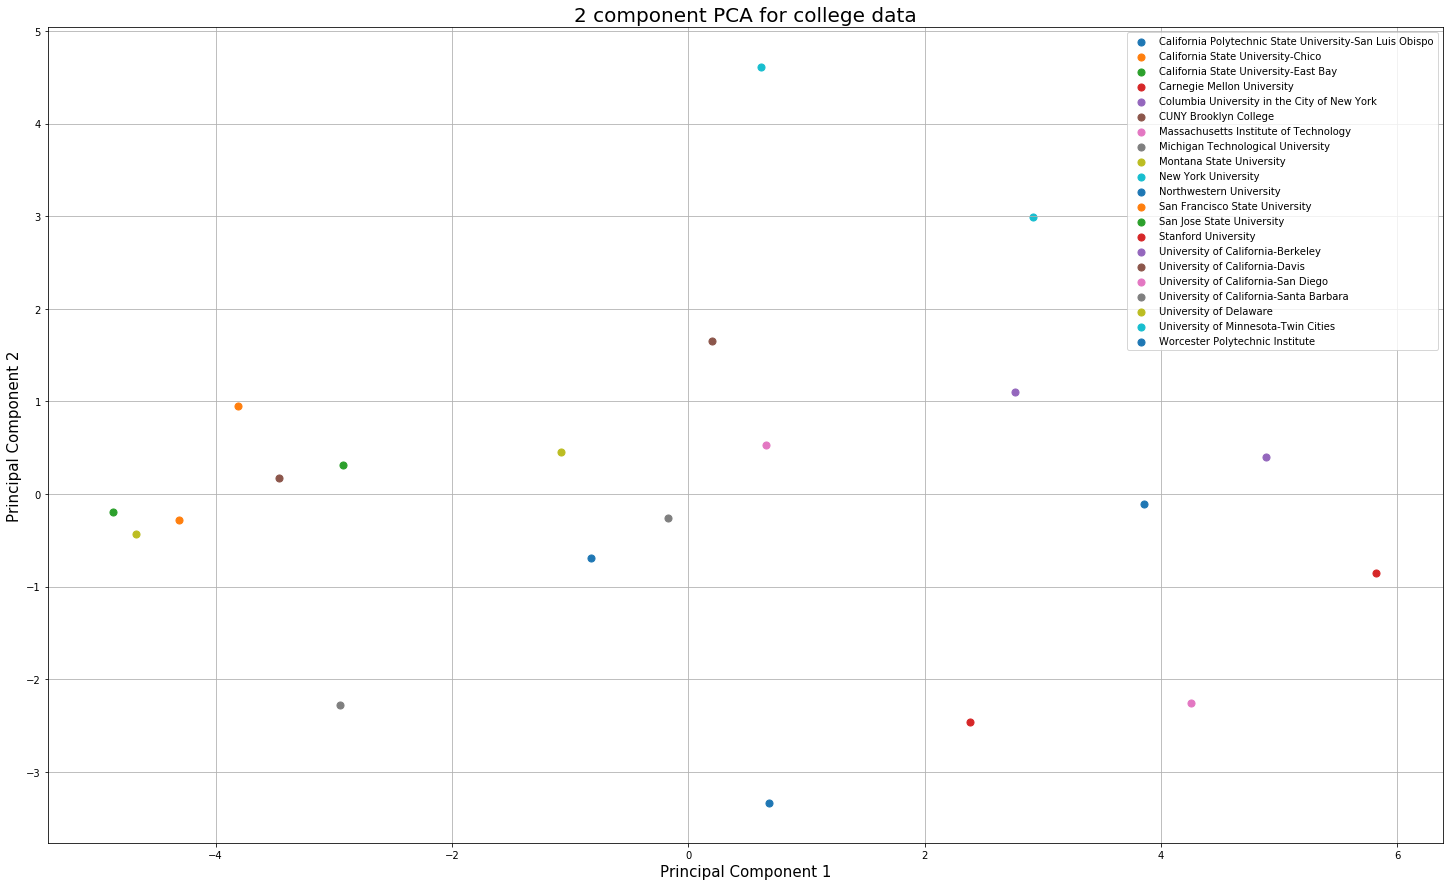

In [23]:
fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for college data', fontsize = 20)
#colors = ['r', 'g', 'b']
for i in d1:
    indicesToKeep = finalDf['Institution Name'] == i
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,s = 50)
ax.legend(d1)
ax.grid()

In [24]:
#4C

In [25]:
#d11 = data[['Early Career Pay','Mid-Career Pay']]
d2 = data[['Early Career Pay', 'Mid-Career Pay','Total price for in-district students living on campus  2015-16 (DRVIC2015)','Professors (S2014_SIS_RV  With faculty status  tenured)','Associate professors (S2014_SIS_RV  With faculty status  tenured)','Assistant professors (S2014_SIS_RV  With faculty status  on tenure track)','Average salary equated to 9 months of full-time instructional staff - professors (DRVHR2014_RV)','Average salary equated to 9 months of full-time instructional staff - associate professors (DRVHR2014_RV)','Average salary equated to 9 months of full-time instructional staff - assistant professors (DRVHR2014_RV)','Percent admitted - men (DRVADM2014_RV)','Percent admitted - women (DRVADM2014_RV)','Percent admitted - total (DRVADM2014_RV)','Full-time retention rate  2014 (EF2014D_RV)','Student-to-faculty ratio (EF2014D_RV)','Percent of total enrollment that are women (DRVEF2014_RV)','Total  enrollment (DRVEF2014_RV)','Graduation rate  total cohort (DRVGR2014_RV)','Percent of full-time first-time undergraduates awarded Pell grants (SFA1314_RV)']]
d2

,Early Career Pay,Mid-Career Pay,Total price for in-district students living on campus 2015-16 (DRVIC2015),Professors (S2014_SIS_RV With faculty status tenured),Associate professors (S2014_SIS_RV With faculty status tenured),Assistant professors (S2014_SIS_RV With faculty status on tenure track),Average salary equated to 9 months of full-time instructional staff - professors (DRVHR2014_RV),Average salary equated to 9 months of full-time instructional staff - associate professors (DRVHR2014_RV),Average salary equated to 9 months of full-time instructional staff - assistant professors (DRVHR2014_RV),Percent admitted - men (DRVADM2014_RV),Percent admitted - women (DRVADM2014_RV),Percent admitted - total (DRVADM2014_RV),Full-time retention rate 2014 (EF2014D_RV),Student-to-faculty ratio (EF2014D_RV),Percent of total enrollment that are women (DRVEF2014_RV),Total enrollment (DRVEF2014_RV),Graduation rate total cohort (DRVGR2014_RV),Percent of full-time first-time undergraduates awarded Pell grants (SFA1314_RV)
0,81200,134000,25414,275,172,142,94230,77328,70245,27,35,31,93,22,46,20186,75,13
1,57700,134000,23496,216,98,80,88164,69093,66051,69,73,71,87,26,53,17287,59,42
2,76700,128000,23487,122,94,63,94194,79074,70353,67,72,70,81,27,62,14823,38,58
3,100000,125000,65895,362,96,144,154584,108207,105525,22,28,25,96,10,38,12587,88,14
4,87400,132000,69084,888,184,389,201411,137673,113913,8,6,7,96,6,51,27589,95,16
5,61200,125000,27737,205,132,111,83979,66420,55953,35,36,35,82,14,60,17390,50,58
6,99800,135000,63250,643,116,167,195282,132579,113940,6,13,8,99,8,37,11319,91,18
7,61200,125000,27677,106,123,106,110097,88614,76032,75,76,76,85,13,26,7099,64,25
8,61400,126000,20099,175,143,149,95364,72081,67779,80,87,84,76,19,46,14982,50,27
9,78100,132000,68400,1027,481,334,194553,113760,109584,37,35,35,92,10,55,49274,83,23


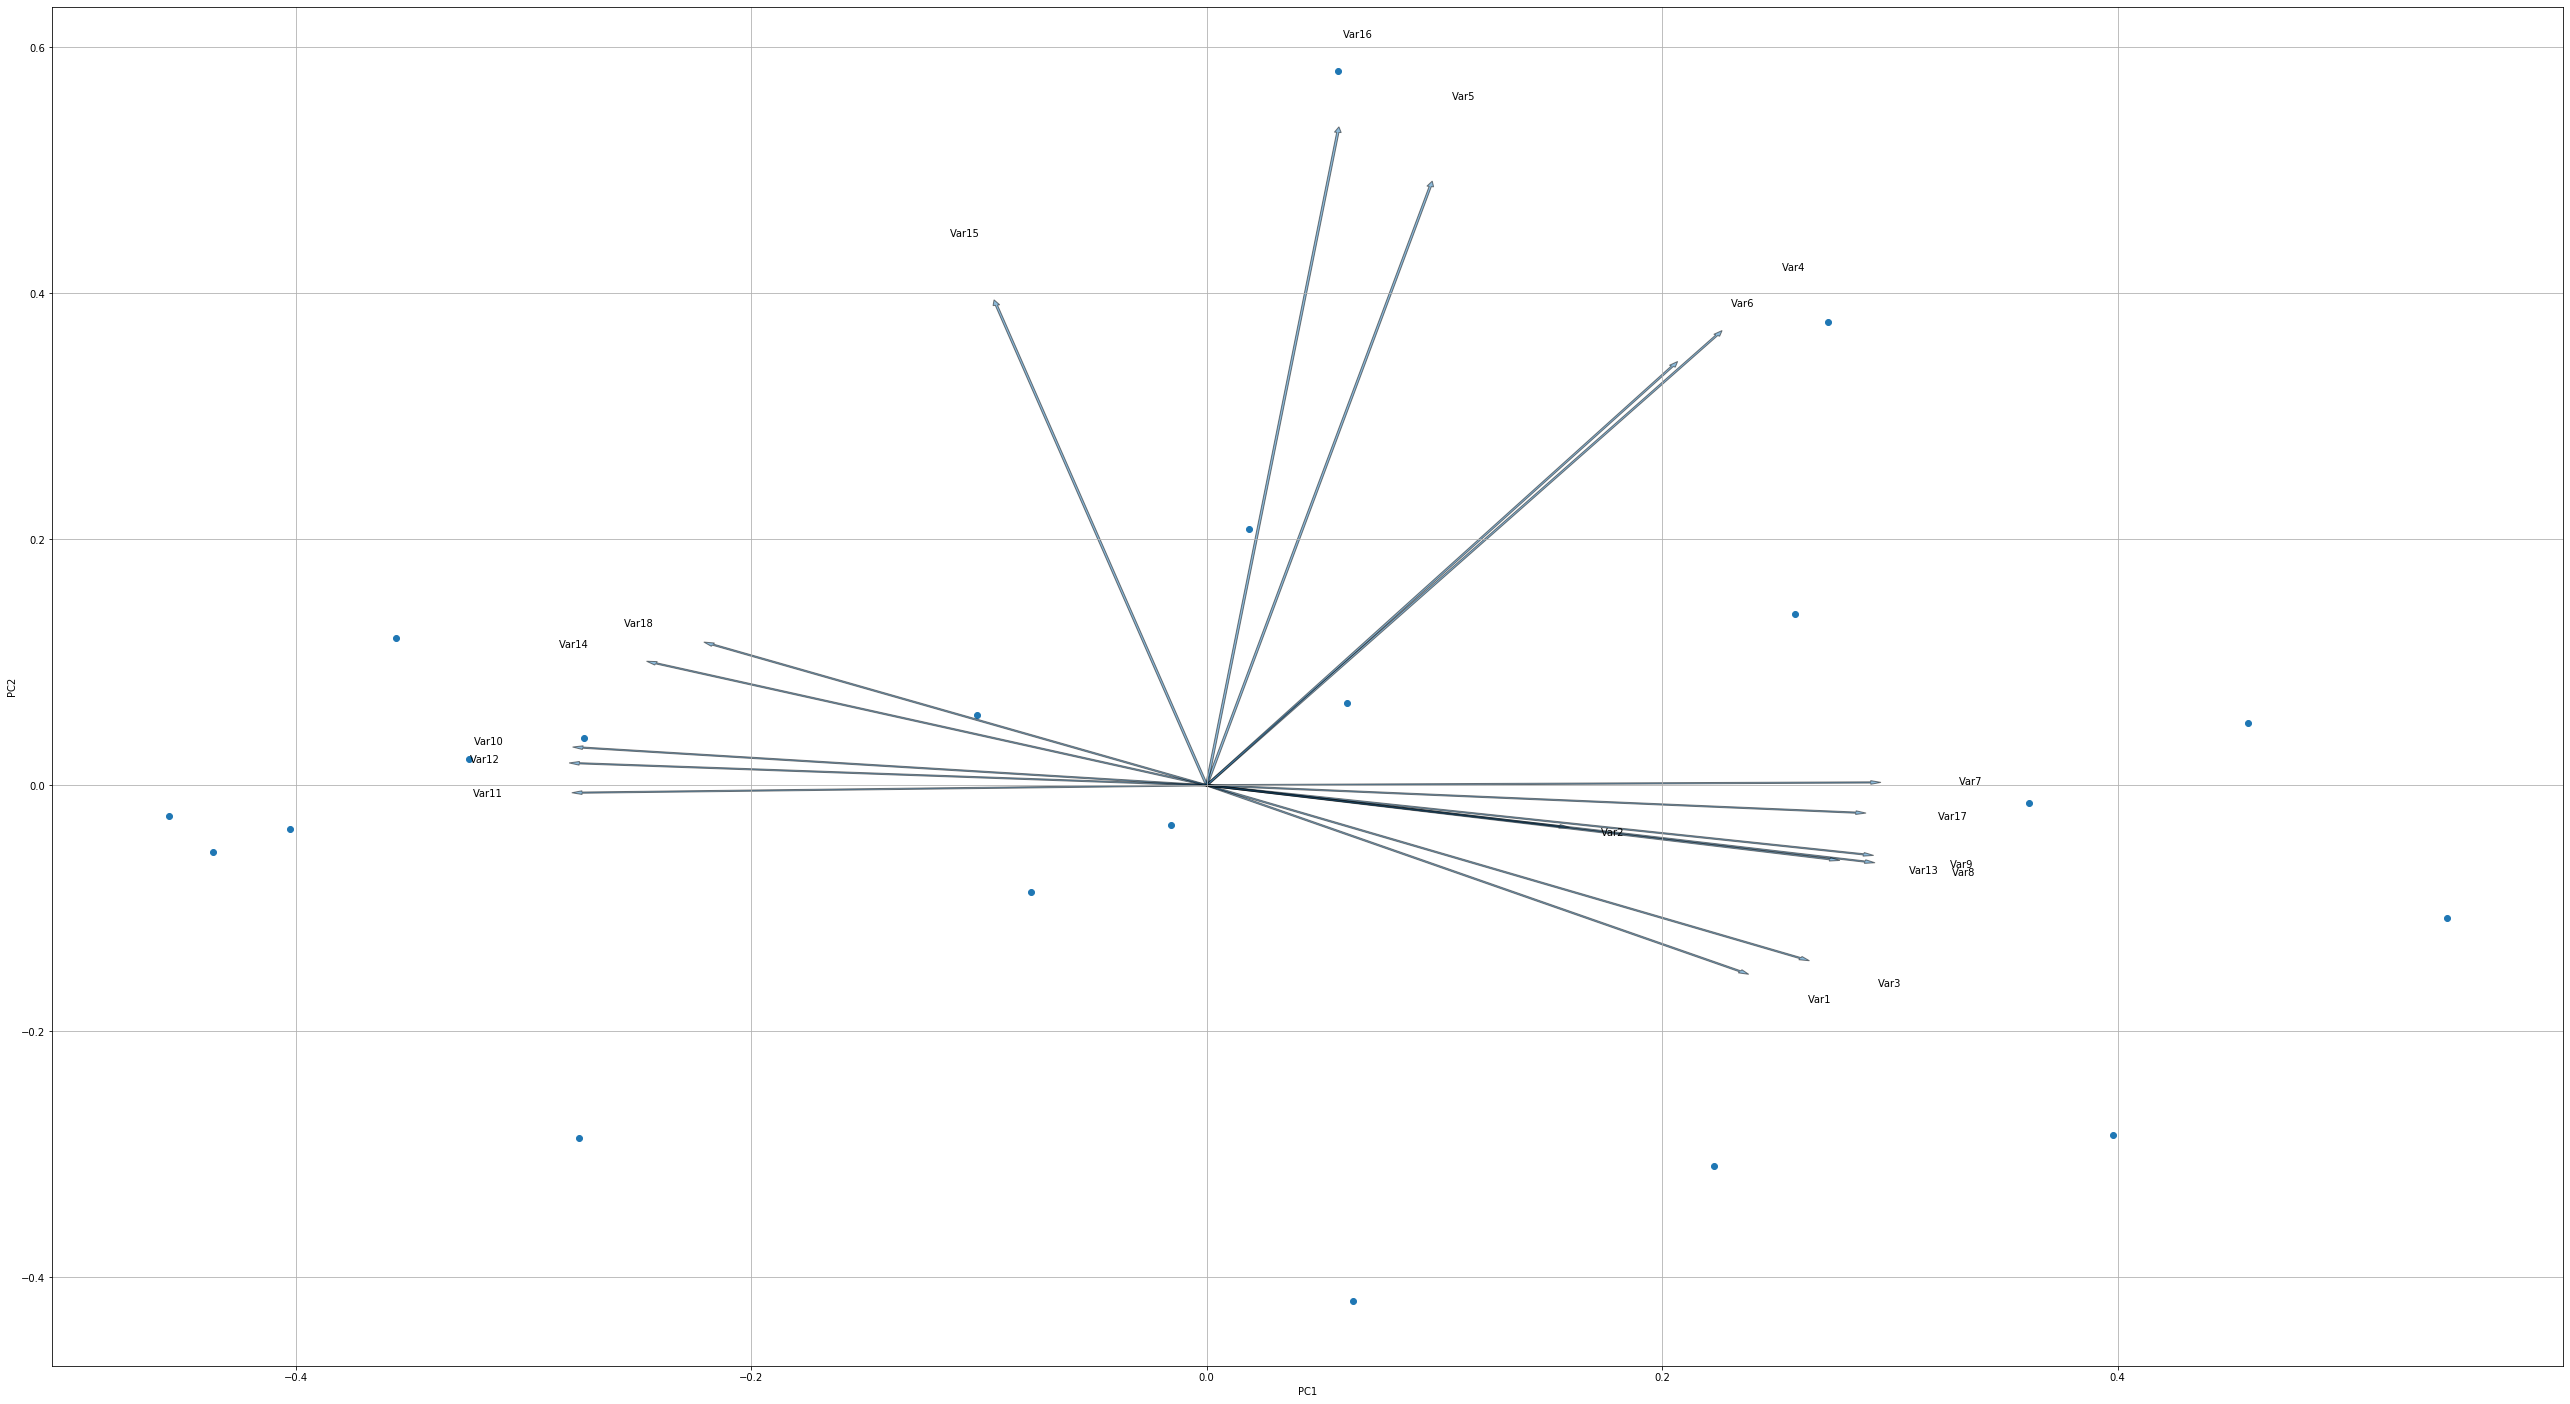

In [26]:
features = list(d2.columns)
x = d2.values
y = data['Institution Name']
y = y.values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(data = x, columns = features)
X = x
y = y  
pca2 = PCA()
x_new = pca2.fit_transform(X)
plt.figure(figsize=(45,25))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
myplot(x_new[:,0:2],np.transpose(pca2.components_[0:2, :]))
plt.show()

In [27]:
#4D

In [28]:
#def draw_vector(v0, v1, ax=None):
#    ax = ax or plt.gca()
#    arrowprops=dict(arrowstyle='->',
#                    linewidth=2,
#                    shrinkA=0, shrinkB=0)
#    ax.annotate('', v1, v0, arrowprops=arrowprops)
#print(pca2.explained_variance_)
#print("-------------------")
#print(pca2.components_)
#plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

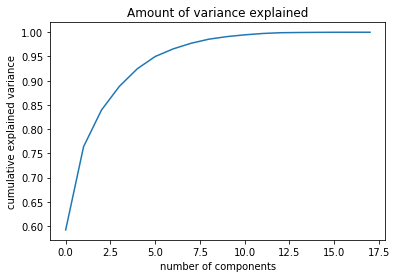

In [29]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Amount of variance explained')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The amount of variance for the college data is in between 10 and 12.5 number of components. 

In [30]:
#5A

In [31]:
data1 = pd.read_csv("p2-data/stock_data.csv")
data1

,Date,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DD,GS,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
0,1/2/19,157.919998,95.680000,323.809998,126.379997,42.950001,110.690002,108.970001,77.596664,172.029999,...,43.250000,91.279999,117.370003,243.490005,108.300003,132.919998,56.020000,68.040001,93.339996,69.690002
1,1/3/19,142.190002,93.430000,310.899994,121.510002,41.070000,108.570000,106.330002,74.735893,169.509995,...,42.040001,90.639999,115.260002,236.850006,103.480003,128.130005,56.220001,67.330002,92.860001,68.620003
2,1/4/19,148.259995,97.639999,327.079987,128.149994,42.919998,110.820000,109.610001,77.895554,175.050003,...,43.000000,92.489998,118.680000,239.619995,107.019997,133.649994,56.360001,69.570000,93.440002,71.150002
3,1/7/19,147.929993,98.169998,328.109985,128.229996,43.209999,112.260002,110.559998,77.938248,176.020004,...,43.230000,92.120003,118.300003,240.080002,106.970001,136.059998,56.720001,69.970001,94.540001,71.519997
4,1/8/19,150.750000,98.650002,340.529999,129.770004,43.560001,111.769997,111.419998,78.834915,175.369995,...,43.430000,92.459999,117.839996,243.289993,108.900002,136.800003,58.380001,71.370003,95.199997,72.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,12/23/19,284.000000,124.489998,337.549988,148.500000,48.099998,120.330002,144.679993,63.919998,229.089996,...,39.320000,124.900002,136.229996,295.089996,149.820007,187.080002,61.400002,58.570000,119.029999,70.290001
247,12/24/19,284.269989,124.739998,333.000000,147.479996,47.779999,120.339996,145.289993,63.779999,229.910004,...,39.290001,125.220001,135.830002,294.540009,149.570007,187.570007,61.279999,58.349998,119.510002,70.019997
248,12/26/19,289.910004,125.410004,329.920013,148.220001,47.849998,120.599998,145.699997,63.730000,231.210007,...,39.380001,125.220001,136.289993,295.649994,150.710007,189.160004,61.290001,58.900002,119.519997,70.129997
249,12/27/19,289.799988,125.190002,330.140015,148.279999,47.770000,120.300003,145.750000,63.730000,230.660004,...,39.320000,126.089996,136.800003,295.970001,150.279999,189.389999,61.529999,59.020000,119.589996,69.889999


In [32]:
features = list(data1.columns)
del features[0]
features
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [33]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,7.844322,3.943560
1,8.419397,5.545980
2,7.621781,3.740737
3,7.481112,3.607518
4,7.182102,2.744357
...,...,...
246,-5.994805,-4.235456
247,-6.082637,-4.027866
248,-6.308655,-4.165328
249,-6.422475,-4.153716


In [34]:
finalDf = pd.concat([principalDf, data1[['Date']]], axis = 1)
finalDf

,principal component 1,principal component 2,Date
0,7.844322,3.943560,1/2/19
1,8.419397,5.545980,1/3/19
2,7.621781,3.740737,1/4/19
3,7.481112,3.607518,1/7/19
4,7.182102,2.744357,1/8/19
...,...,...,...
246,-5.994805,-4.235456,12/23/19
247,-6.082637,-4.027866,12/24/19
248,-6.308655,-4.165328,12/26/19
249,-6.422475,-4.153716,12/27/19


In [35]:
#5B

In [36]:
data11 = data1.drop(['Date'],axis = 1)
data11.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DD,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
0,157.919998,95.680000,323.809998,126.379997,42.950001,110.690002,108.970001,77.596664,172.029999,172.410004,...,43.250000,91.279999,117.370003,243.490005,108.300003,132.919998,56.020000,68.040001,93.339996,69.690002
1,142.190002,93.430000,310.899994,121.510002,41.070000,108.570000,106.330002,74.735893,169.509995,168.610001,...,42.040001,90.639999,115.260002,236.850006,103.480003,128.130005,56.220001,67.330002,92.860001,68.620003
2,148.259995,97.639999,327.079987,128.149994,42.919998,110.820000,109.610001,77.895554,175.050003,173.619995,...,43.000000,92.489998,118.680000,239.619995,107.019997,133.649994,56.360001,69.570000,93.440002,71.150002
3,147.929993,98.169998,328.109985,128.229996,43.209999,112.260002,110.559998,77.938248,176.020004,177.039993,...,43.230000,92.120003,118.300003,240.080002,106.970001,136.059998,56.720001,69.970001,94.540001,71.519997
4,150.750000,98.650002,340.529999,129.770004,43.560001,111.769997,111.419998,78.834915,175.369995,177.889999,...,43.430000,92.459999,117.839996,243.289993,108.900002,136.800003,58.380001,71.370003,95.199997,72.040001


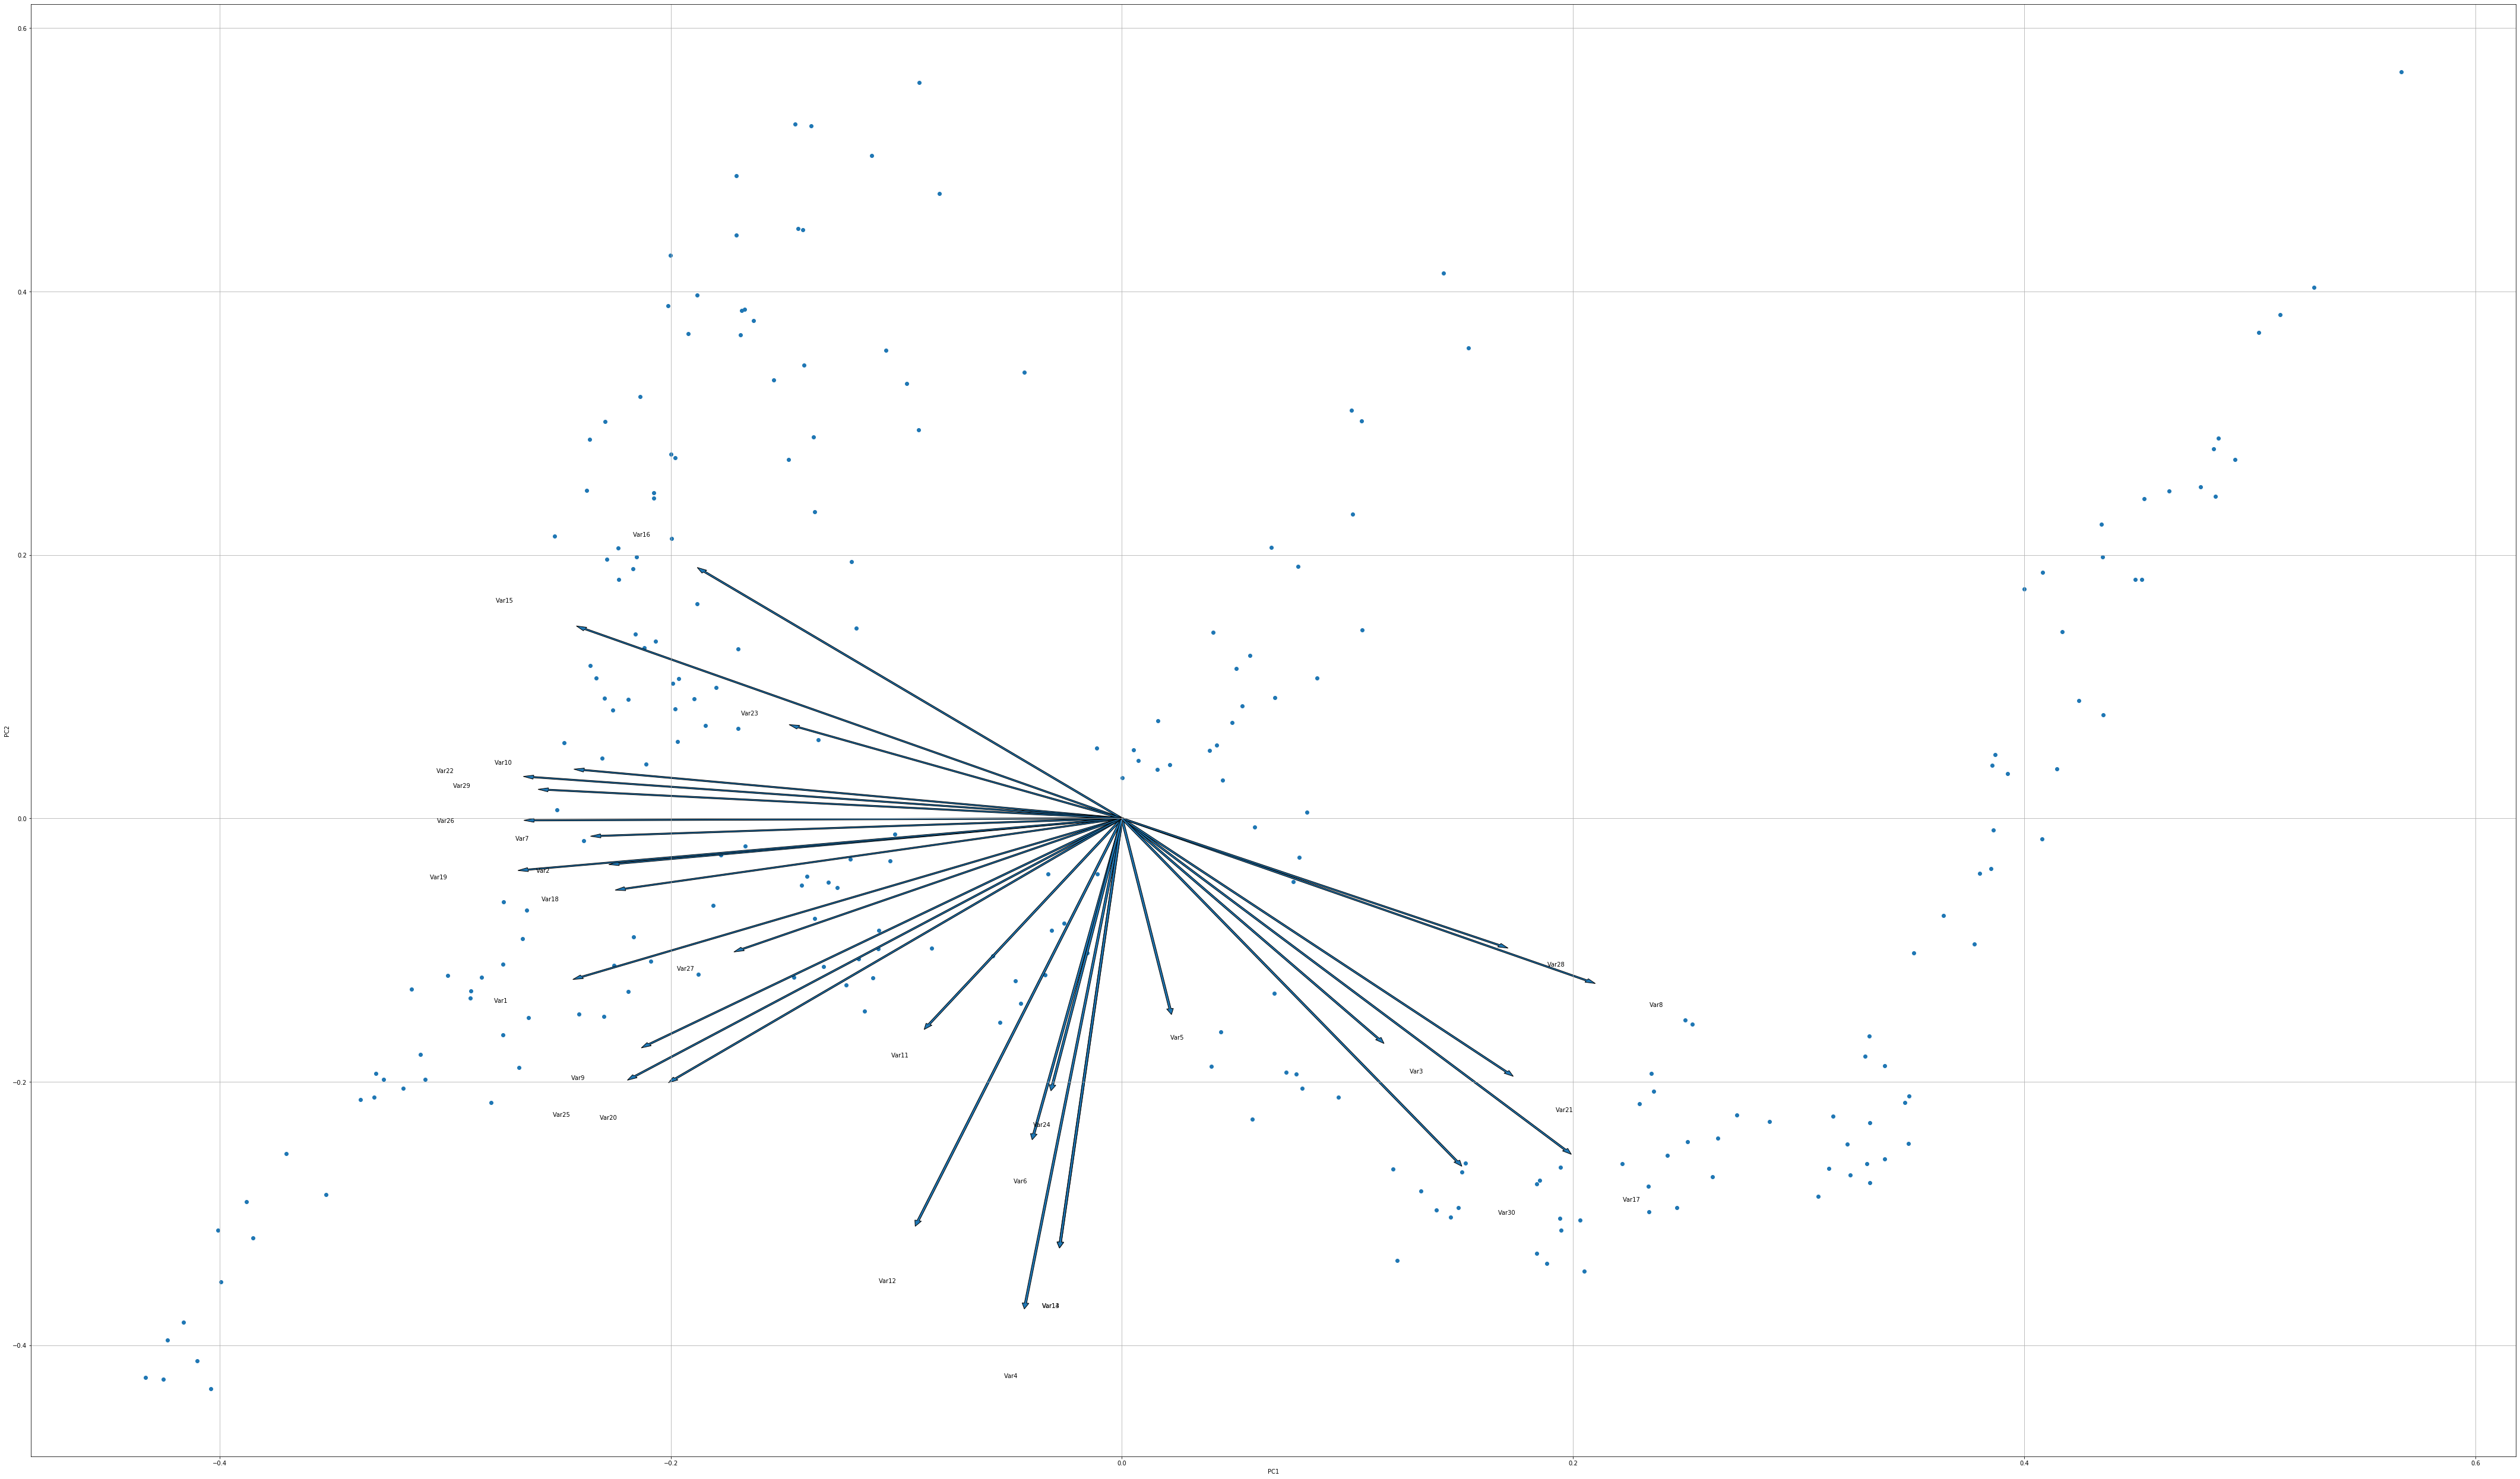

In [37]:
#features = list(d2.columns)
x = data11.values
y = data1['Date']
y = y.values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(data = x, columns = features)
X = x
y = y  
pca2 = PCA()
x_new = pca2.fit_transform(X)
plt.figure(figsize=(75,45))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],alpha = 1)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
myplot(x_new[:,0:2],np.transpose(pca2.components_[0:2, :]))
plt.show()

In [38]:
#5C

From the overlay of the Principal components for the stock data. We can observe that among all 30 types of stocks given in the data, only 7 lies on the positive side and the rest lays on the negative side.

In [40]:
#5D

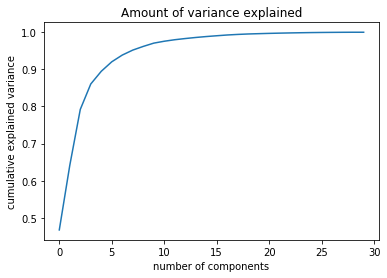

In [41]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Amount of variance explained')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The amount of variance for the stock data can be seen around 15 number of components.

In [42]:
#6

In [43]:
data2 = pd.read_csv("p2-data/congress/H116_votes.csv")
data2.head()

,CongNum,icpsr,StateCode,District,StateNm,PartyCode,ICPSRocc,Name,212,653,...,126,721,55,502,388,404,74,231,722,78
0,116,21376,41,1,ALABAMA,200,NaN,BYRNE,9,9,...,6,9,1,1,1,1,1,1,9,6
1,116,21192,41,2,ALABAMA,200,NaN,ROBY,1,6,...,6,6,1,1,6,6,1,1,1,6
2,116,20301,41,3,ALABAMA,200,NaN,ROGERS,1,6,...,6,6,1,1,1,1,1,1,1,6
3,116,29701,41,4,ALABAMA,200,NaN,ADERHOLT,1,6,...,6,6,1,1,6,6,1,1,1,6
4,116,21193,41,5,ALABAMA,200,NaN,BROOKS,1,6,...,6,6,1,1,1,1,6,6,1,6


In [44]:
data2 = data2.drop(['ICPSRocc'],axis = 1)
data2.head()

,CongNum,icpsr,StateCode,District,StateNm,PartyCode,Name,212,653,112,...,126,721,55,502,388,404,74,231,722,78
0,116,21376,41,1,ALABAMA,200,BYRNE,9,9,1,...,6,9,1,1,1,1,1,1,9,6
1,116,21192,41,2,ALABAMA,200,ROBY,1,6,1,...,6,6,1,1,6,6,1,1,1,6
2,116,20301,41,3,ALABAMA,200,ROGERS,1,6,9,...,6,6,1,1,1,1,1,1,1,6
3,116,29701,41,4,ALABAMA,200,ADERHOLT,1,6,1,...,6,6,1,1,6,6,1,1,1,6
4,116,21193,41,5,ALABAMA,200,BROOKS,1,6,1,...,6,6,1,1,1,1,6,6,1,6


In [45]:
data21 = data2.drop(['StateNm','Name'],axis = 1)
data21.head()

,CongNum,icpsr,StateCode,District,PartyCode,212,653,112,548,439,...,126,721,55,502,388,404,74,231,722,78
0,116,21376,41,1,200,9,9,1,6,6,...,6,9,1,1,1,1,1,1,9,6
1,116,21192,41,2,200,1,6,1,6,6,...,6,6,1,1,6,6,1,1,1,6
2,116,20301,41,3,200,1,6,9,6,6,...,6,6,1,1,1,1,1,1,1,6
3,116,29701,41,4,200,1,6,1,6,6,...,6,6,1,1,6,6,1,1,1,6
4,116,21193,41,5,200,1,6,1,6,6,...,6,6,1,1,1,1,6,6,1,6


In [46]:
#6A

In [47]:
features = list(data21.columns)
del features[4]
features
x = data21.loc[:, features].values
y = data21.loc[:,['PartyCode']].values
x = StandardScaler().fit_transform(x)
#x

In [48]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,6.742314,1.464044
1,4.654641,0.395541
2,5.152569,0.516111
3,5.247412,-1.320096
4,6.910273,2.920687
...,...,...
434,6.182275,4.505223
435,5.453018,1.073695
436,2.866367,-0.560380
437,4.788966,-0.925157


In [49]:
finalDf = pd.concat([principalDf, data21[['PartyCode']]], axis = 1)
finalDf

,principal component 1,principal component 2,PartyCode
0,6.742314,1.464044,200
1,4.654641,0.395541,200
2,5.152569,0.516111,200
3,5.247412,-1.320096,200
4,6.910273,2.920687,200
...,...,...,...
434,6.182275,4.505223,200
435,5.453018,1.073695,200
436,2.866367,-0.560380,200
437,4.788966,-0.925157,200


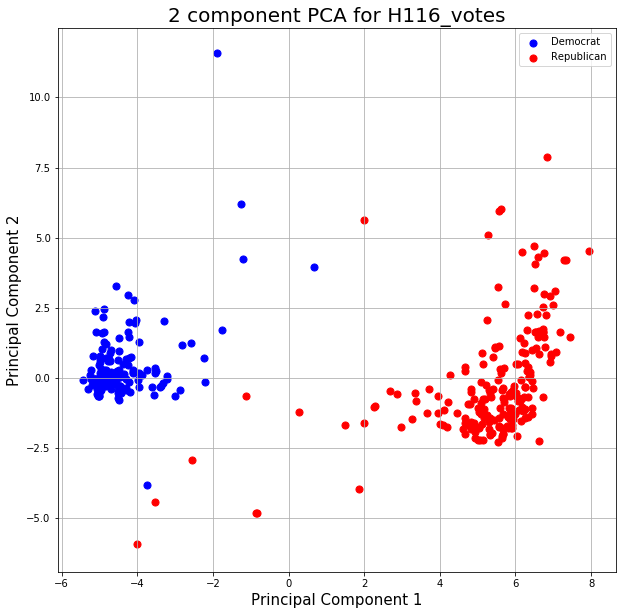

In [50]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for H116_votes', fontsize = 20)
targets = [100,200]
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['PartyCode'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
targets = ['Democrat','Republican']
ax.legend(targets)
ax.grid()

In [51]:
#6C

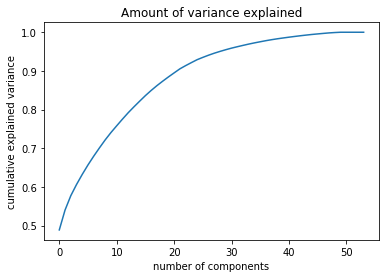

In [52]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Amount of variance explained')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [53]:
#6B

In [54]:
outlier = data2.drop(['CongNum','StateNm','Name','icpsr'],axis = 1)
outlier.head()

,StateCode,District,PartyCode,212,653,112,548,439,460,498,...,126,721,55,502,388,404,74,231,722,78
0,41,1,200,9,9,1,6,6,1,1,...,6,9,1,1,1,1,1,1,9,6
1,41,2,200,1,6,1,6,6,1,9,...,6,6,1,1,6,6,1,1,1,6
2,41,3,200,1,6,9,6,6,1,1,...,6,6,1,1,1,1,1,1,1,6
3,41,4,200,1,6,1,6,6,1,1,...,6,6,1,1,6,6,1,1,1,6
4,41,5,200,1,6,1,6,6,1,1,...,6,6,1,1,1,1,6,6,1,6


In [55]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(outlier))
print(z)

[[0.01021834 0.86110115 1.05305757 ... 0.43717448 3.44619624 1.00514244]
 [0.01021834 0.76676039 1.05305757 ... 0.43717448 0.2893103  1.00514244]
 [0.01021834 0.67241964 1.05305757 ... 0.43717448 0.2893103  1.00514244]
 ...
 [0.75333111 0.29505662 1.05305757 ... 0.43717448 0.75624862 1.00514244]
 [0.75333111 0.20071586 1.05305757 ... 1.77388079 0.2893103  1.00514244]
 [1.29870804 0.86110115 1.05305757 ... 0.43717448 3.44619624 1.00514244]]


In [56]:
threshold = 3
print(np.where(z > 7.2101))
print(z[110][45])

(array([110, 186, 253, 289, 359, 390, 434], dtype=int64), array([45, 45, 45, 45, 45, 45, 45], dtype=int64))
7.21196886151298


In [57]:
#check
qwerty = list(outlier.columns)
print(qwerty[45])
outlier.at[253,'55']

55


9

In [58]:
outlier1 = outlier.iloc[[110,186,253,289]]
outlier12 = data2.iloc[[110,186,253,289]]
outlier1

,StateCode,District,PartyCode,212,653,112,548,439,460,498,...,126,721,55,502,388,404,74,231,722,78
110,43,24,100,6,1,6,1,1,1,9,...,1,1,9,6,6,6,9,9,1,1
186,52,6,100,6,1,6,1,1,1,1,...,1,1,9,6,6,6,1,1,1,1
253,12,10,100,6,1,6,1,1,1,1,...,1,1,9,6,6,6,1,1,1,1
289,47,3,200,0,0,0,0,0,0,0,...,0,0,9,0,0,0,9,0,0,0


In [59]:
outlier1.reset_index(drop=True, inplace=True)
outlier12.reset_index(drop=True, inplace=True)
outlier12=outlier12.drop(['StateNm','PartyCode'],axis=1)
outlier12

,CongNum,icpsr,StateCode,District,Name,212,653,112,548,439,...,126,721,55,502,388,404,74,231,722,78
0,116,21118,43,24,WILSON,6,1,6,1,1,...,1,1,9,6,6,6,9,9,1,1
1,116,21978,52,6,TRONE,6,1,6,1,1,...,1,1,9,6,6,6,1,1,1,1
2,116,31103,12,10,PAYNE,6,1,6,1,1,...,1,1,9,6,6,6,1,1,1,1
3,116,29546,47,3,JONES,0,0,0,0,0,...,0,0,9,0,0,0,9,0,0,0


In [60]:
features = list(outlier1.columns)
del features[2]
features
x = outlier1.loc[:, features].values
y = outlier12.loc[:,['Name']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
#principalDf
finalDf = pd.concat([principalDf, outlier12[['Name']]], axis = 1)
finalDf

,principal component 1,principal component 2,Name
0,-3.890279,3.039510,WILSON
1,-3.814618,-2.234001,TRONE
2,-3.864515,-0.817805,PAYNE
3,11.569412,0.012296,JONES


In [61]:
data_out = outlier12['Name']
dout = data_out.tolist()
dout

['WILSON', 'TRONE', 'PAYNE', 'JONES']

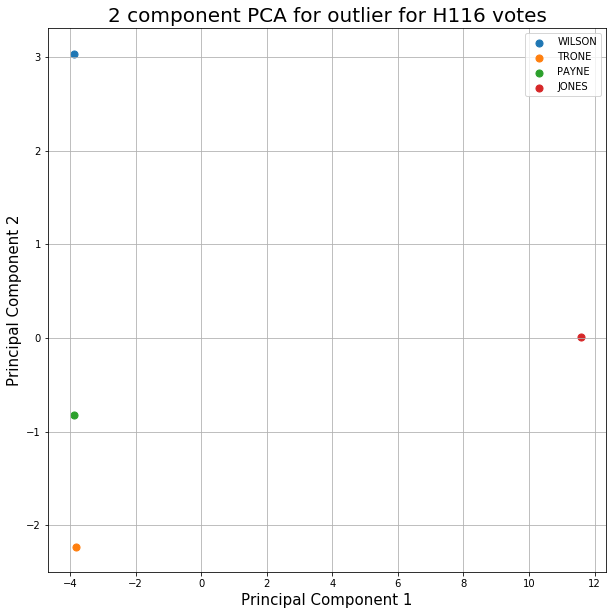

In [62]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for outlier for H116 votes', fontsize = 20)
for i in dout:
    indicesToKeep = finalDf['Name'] == i
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
            ,finalDf.loc[indicesToKeep, 'principal component 2']
            ,s = 50)
ax.legend(dout)
ax.grid()

The votes for the column 55 have some outliers, for some people the votes are 9 and for the rest of the people the votes are 0.
Among all I have separated the top 4 outliers in which 3 of them belogs to democrat party and remaining one belongs to Republican. The same have been plotted in the above PCA.

In [63]:
#6D

In [64]:
data3 = pd.read_csv("p2-data/congress/H112_votes.csv")
data3.head()

,CongNum,icpsr,StateCode,District,StateNm,PartyCode,ICPSRocc,Name,253,345,...,873,444,168,116,1562,1057,273,948,1169,988
0,112,20300,41,1,ALABAMA,200,1,BONNER,1,1,...,6,1,6,6,9,1,6,1,1,1
1,112,21192,41,2,ALABAMA,200,1,ROBY,1,1,...,6,1,6,6,1,1,6,1,1,9
2,112,20301,41,3,ALABAMA,200,1,ROGERS,1,1,...,6,1,6,6,1,1,6,1,1,1
3,112,29701,41,4,ALABAMA,200,1,ADERHOLT,1,1,...,6,1,6,6,1,1,6,1,1,1
4,112,21193,41,5,ALABAMA,200,1,BROOKS,1,1,...,6,1,6,6,1,1,1,1,1,1


In [65]:
data31 = data3.drop(['StateNm','Name'],axis = 1)
data31.dropna()

,CongNum,icpsr,StateCode,District,PartyCode,ICPSRocc,253,345,456,793,...,873,444,168,116,1562,1057,273,948,1169,988
0,112,20300,41,1,200,1,1,1,6,6,...,6,1,6,6,9,1,6,1,1,1
1,112,21192,41,2,200,1,1,1,6,6,...,6,1,6,6,1,1,6,1,1,9
2,112,20301,41,3,200,1,1,1,6,6,...,6,1,6,6,1,1,6,1,1,1
3,112,29701,41,4,200,1,1,1,6,6,...,6,1,6,6,1,1,6,1,1,1
4,112,21193,41,5,200,1,1,1,6,6,...,6,1,6,6,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,112,14657,25,5,200,1,1,1,6,6,...,6,1,6,6,1,1,6,1,1,1
441,112,14675,25,6,200,1,1,1,6,6,...,6,1,6,6,1,1,6,1,1,1
442,112,21189,25,7,200,1,1,1,6,6,...,6,1,6,6,1,1,6,1,1,1
443,112,21190,25,8,200,1,1,1,6,6,...,1,1,6,6,1,1,1,1,1,1


In [66]:
features = list(data31.columns)
del features[4]
#features
x = data31.loc[:, features].values
y = data31.loc[:,['PartyCode']].values
x = StandardScaler().fit_transform(x)
#x

In [67]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-3.672265,-1.641268
1,-3.388487,-1.372785
2,-3.468244,-1.224499
3,-3.605724,-1.151138
4,-4.211387,0.145211
...,...,...
440,-4.934277,1.187586
441,-4.719577,0.768137
442,-3.463640,-0.886807
443,-4.291729,0.287131


In [68]:
finalDf = pd.concat([principalDf, data31[['PartyCode']]], axis = 1)
finalDf

,principal component 1,principal component 2,PartyCode
0,-3.672265,-1.641268,200
1,-3.388487,-1.372785,200
2,-3.468244,-1.224499,200
3,-3.605724,-1.151138,200
4,-4.211387,0.145211,200
...,...,...,...
440,-4.934277,1.187586,200
441,-4.719577,0.768137,200
442,-3.463640,-0.886807,200
443,-4.291729,0.287131,200


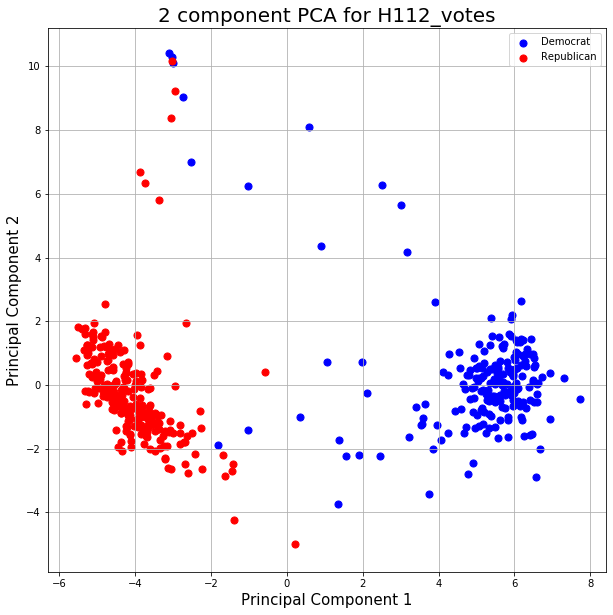

In [69]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for H112_votes', fontsize = 20)
targets = [100,200]
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['PartyCode'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
targets = ['Democrat','Republican']
ax.legend(targets)
ax.grid()

In [70]:
#6E

In [71]:
a = []
data123 = os.listdir("p2-data/congress")
for i in data123:
    a.append(i)
#a
b = len(a)
#b
c = [y.replace('.csv', '') for y in a]
#c

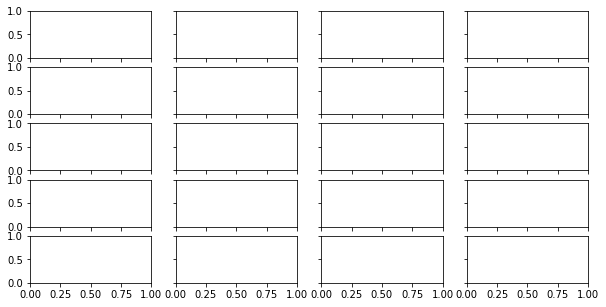

In [72]:
fig, axes = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True, figsize=(10,5))
axes_list = [item for sublist in axes for item in sublist] 

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


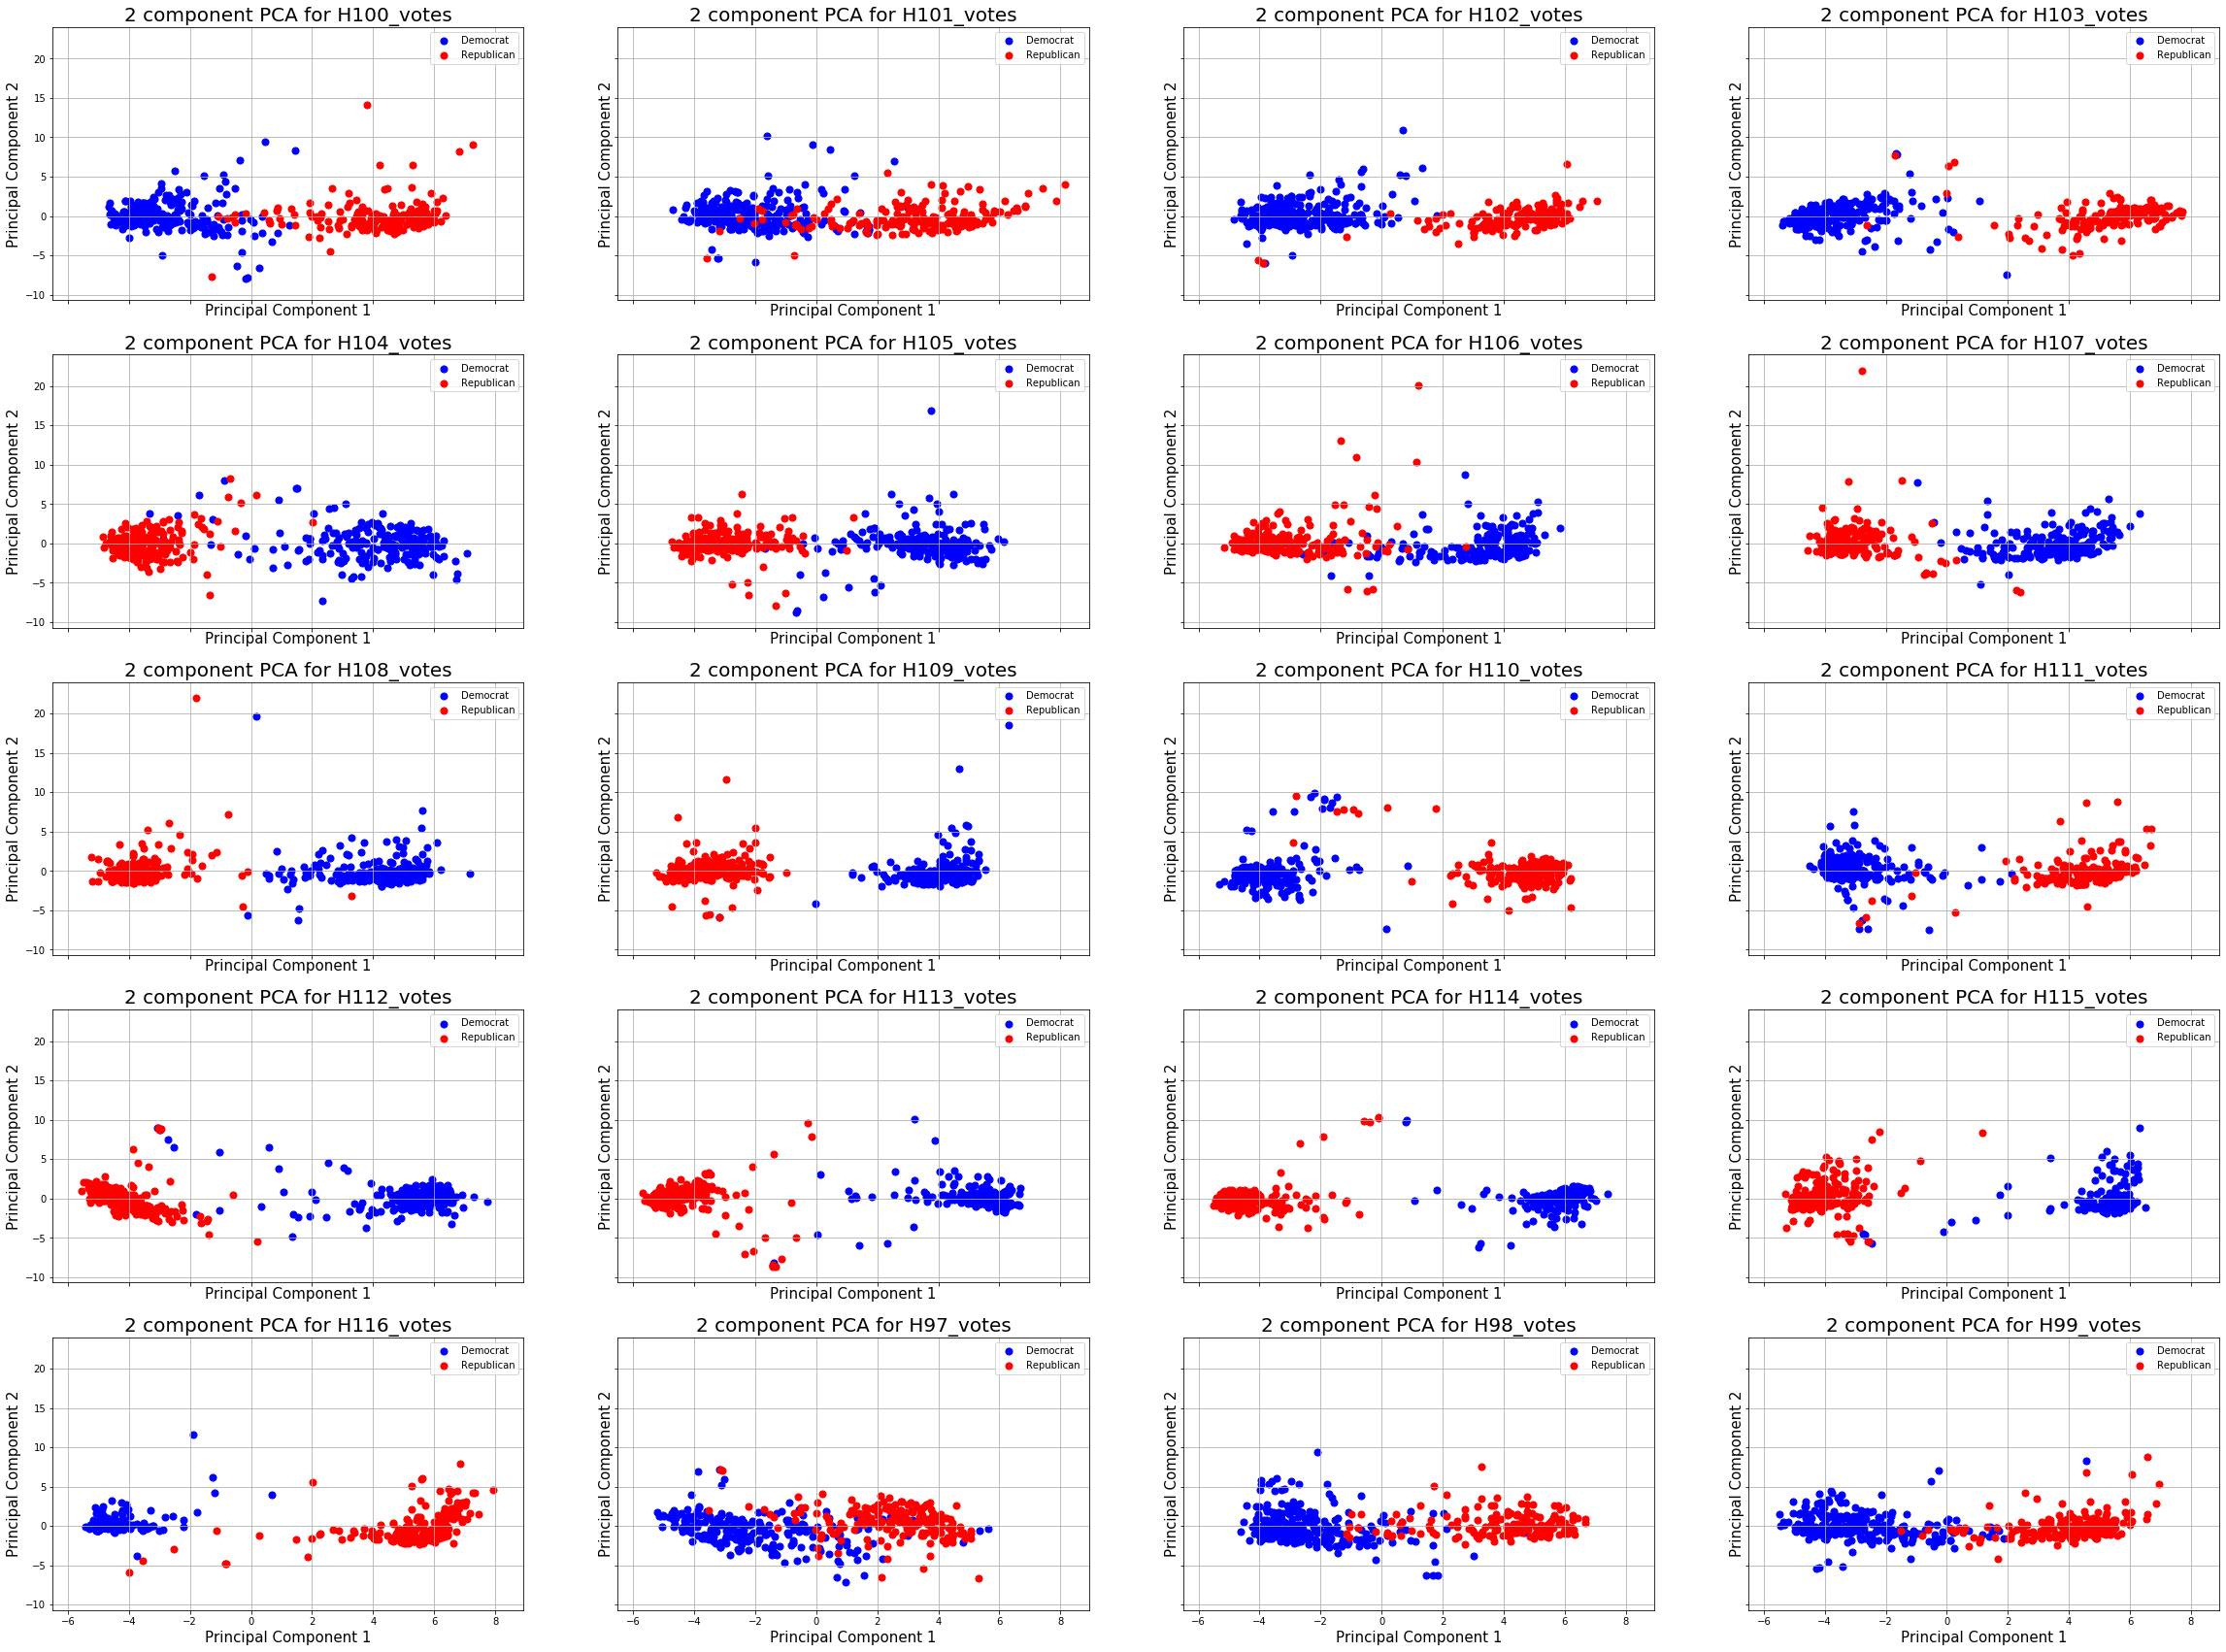

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [73]:
fig, axes = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True, figsize=(40,30))
axes_list = [item for sublist in axes for item in sublist] 
for i in range(b):
    data54 = pd.read_csv("p2-data/congress/" +str(a[i]))
    #print(data54)
    data54 = data54.drop(['ICPSRocc','Name','StateNm'],axis = 1)
    features = list(data54.columns)
    #print(features)
    del features[4]
    x = data54.loc[:, features].values
    y = data54.loc[:,['PartyCode']].values
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
    #print(principalDf)
    finalDf = pd.concat([principalDf, data54[['PartyCode']]], axis = 1)
    #print(finalDf)
    fig = plt.figure(figsize = (10,10))
    ax = axes_list.pop(0)
    #ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA for '+str(c[i]), fontsize = 20)
    targets = [100,200]
    colors = ['b','r']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['PartyCode'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   ,finalDf.loc[indicesToKeep, 'principal component 2']
                   ,c = color
                   ,s = 50)
    targets = ['Democrat','Republican']
    ax.legend(targets)
    ax.grid()
    